# Import

In [9]:
import numpy as np
import cortex
import matplotlib.pyplot as plt

# Visualize correlations and stacking weights

In [53]:
mask = cortex.db.get_mask('MNI','atlas_152_sub1','thin')
vols = {}
neuromod_subjects = ['01', '02', '03', '04', '05', '06']
S_subjects = {}
r2s = {'individual_r2s':{}, 'stacked_r2s':{}}
for sub in neuromod_subjects:
    corrs_path = 'stacking_results/stacking_results_{}_rep_2_with_speaker_elmo.npy'.format(sub)
    loaded = np.load(corrs_path, allow_pickle=True).item()
    elmo_corrs = loaded['all_corrs_stored']['corrs'][0]
    speaker_corrs = loaded['all_corrs_stored']['corrs'][1]
    stacked_corrs = loaded['all_corrs_stored']['stacked_corrs']
    S_subjects[sub] = loaded['S_average']
    vols['elmo, sub'+sub] = cortex.Volume(elmo_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    vols['speaker, sub'+sub] = cortex.Volume(speaker_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    vols['stacked, sub'+sub] = cortex.Volume(stacked_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    vols['S_elmo, sub'+sub] = cortex.Volume(S_subjects[sub][:,0], 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    vols['S_speaker, sub'+sub] = cortex.Volume(S_subjects[sub][:,1], 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    r2s['individual_r2s'][sub] = loaded['all_r2s_stored']['r2s']
    r2s['stacked_r2s'][sub] = loaded['all_r2s_stored']['stacked_r2s']

In [ ]:
# mean_stacked, mean_elmo, mean_speaker = None, None, None
# for sub in neuromod_subjects:
#     if mean_stacked is not None:
#         mean_stacked += stacked_corrs
#     else:
#         mean_stacked = stacked_corrs
        
#     if mean_elmo is not None:
#         mean_elmo += S_subjects[sub][:,0]
#     else:
#         mean_elmo = S_subjects[sub][:,0]
        
#     if mean_speaker is not None:
#         mean_speaker += S_subjects[sub][:,1]
#     else:
#         mean_speaker = S_subjects[sub][:,1]
# mean_stacked /= 6
# mean_elmo /= 6
# mean_speaker /= 6
# vols['S_elmo'] = cortex.Volume(mean_elmo, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
# vols['S_speaker'] = cortex.Volume(mean_speaker, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
# vols['stacked'] = cortex.Volume(mean_stacked, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')

In [44]:
cortex.webshow(vols,open_browser=False)

Started server on port 11961


<WebApp(Thread-7, started 13120724992)>

Stopping serverStopping server



# Comparing r-squared values from individual predictors vs stacking

In [7]:
for sub, S in S_subjects.items():
    print("sub{}, S={}".format(sub, S.mean(0)))

sub01, S=[0.55328924 0.44671076]
sub02, S=[0.548425 0.451575]
sub03, S=[0.54598376 0.45401624]
sub04, S=[0.43212979 0.56787021]
sub05, S=[0.50232898 0.49767102]
sub06, S=[0.4609536 0.5390464]


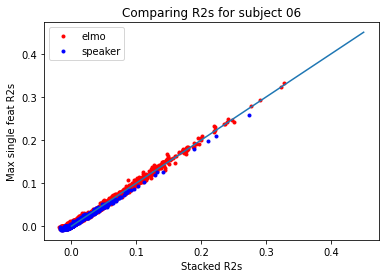

In [54]:
# compare prediction error using stacking method and the best feature
colordict = {0: ('elmo', 'red'), 1: ('speaker', 'blue')}
for sub in neuromod_subjects:
    for i, (feat_name, color) in colordict.items():
        feat_indices = np.where(np.argmax(r2s['individual_r2s'][sub], 0) == i)
        plt.plot(r2s['stacked_r2s'][sub][feat_indices], np.max(r2s['individual_r2s'][sub],axis=0)[feat_indices],'.', c=color, label=feat_name)
    plt.legend()
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Max single feat R2s')
    plt.plot([0,0.45],[0,0.45])

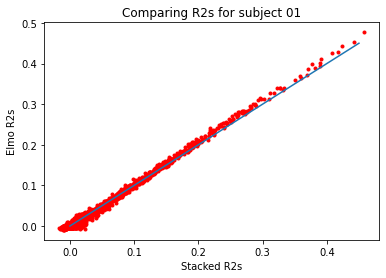

In [37]:
for sub in neuromod_subjects:
    plt.plot(r2s['stacked_r2s'][sub], r2s['individual_r2s'][sub][0],'.',c='red')
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Elmo R2s')
    plt.plot([0,0.45],[0,0.45])

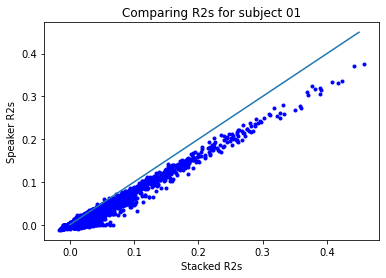

Stopping server


In [38]:
for sub in neuromod_subjects:
    plt.plot(r2s['stacked_r2s'][sub], r2s['individual_r2s'][sub][1],'.',c='blue')
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Speaker R2s')
    plt.plot([0,0.45],[0,0.45])

In [27]:
for sub in neuromod_subjects:
    print("Subject: {}".format(sub))
    print("---> Num Elmo Max R2s: ", r2s['individual_r2s'][sub].shape[1] - np.argmax(r2s['individual_r2s'][sub], 0).sum())
    print("---> Num Speaker Max R2s: ", np.argmax(r2s['individual_r2s'][sub], 0).sum())

Num Elmo Max R2s:  37879
Num Speaker Max R2s:  29578
